--2024-12-19 12:32:27--  https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4062 (4.0K) [text/plain]
Saving to: ‘sales_data.csv’

sales_data.csv      100%[===================>]   3.97K  --.-KB/s    in 0s      

2024-12-19 12:32:27 (47.3 MB/s) - ‘sales_data.csv’ saved [4062/4062]

Mean Squared Error: 6.101072906773963
R-squared: 0.802561303423698


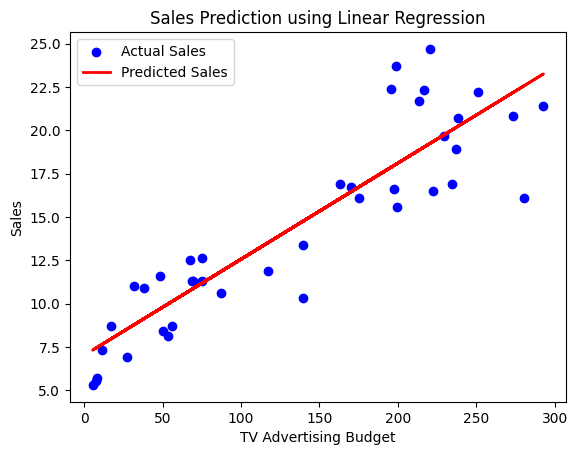

Predicted sales for a TV budget of 200: 18.10369721453449


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Install necessary libraries if not already present
!pip install pandas numpy scikit-learn matplotlib

# Load the dataset
data = pd.read_csv('advertising.csv')

# Feature Engineering
X = data[['TV']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results (optional)
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Sales')
plt.xlabel("TV Advertising Budget") # adjust label according to your feature
plt.ylabel("Sales")
plt.title("Sales Prediction using Linear Regression")
plt.legend()
plt.show()

# Example prediction for a new TV advertising budget (replace with a new value)
new_tv_budget = np.array([[200]]) # make sure to use a 2D array
predicted_sales = model.predict(new_tv_budget)
print(f"Predicted sales for a TV budget of {new_tv_budget[0][0]}: {predicted_sales[0]}")